# Q: Is MFCC a good feature to use for generative ML if you intend to reverse the feature?

When it comes to classifying audio, MFCC can be used effectively.  However with generative ML, one might wish to reconstruct audio from the features after training.  I tried using MFCC features with LSTM but got unpredictible results.  It's often helpful to break down a complex problem into its smallest possible components.  Here I just test the basic idea of reversing MFCC to audio.


In [79]:
%matplotlib notebook
    
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Load a wav
Here we load a wav, visualize the signal, and play back the audio.

<IPython.core.display.Javascript object>


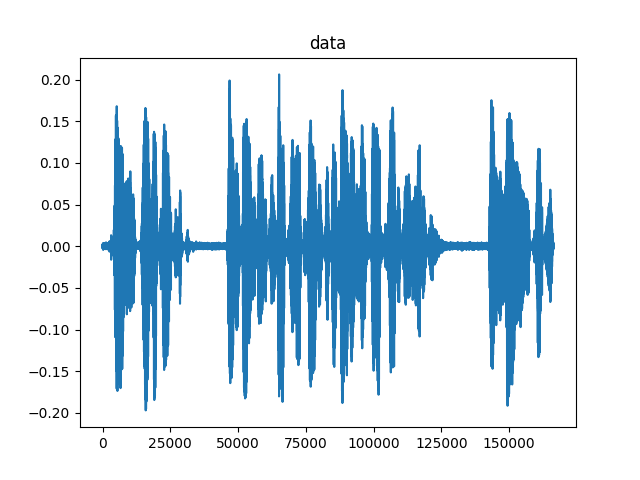

In [80]:
# load a sample
data, rate = librosa.load("this is a test.wav")  

def show_data(data):
    plt.figure()
    plt.title("data")
    plt.plot(data)
    plt.show()

    
show_data(data)
ipd.Audio(data, rate=22050)

# Extract mfcc, and scale data 

before transform  [-479.71692 -474.9977  -473.49344 -472.20352 -474.53415 -464.37848
 -450.7811  -429.95105 -335.3482  -251.65292]


<IPython.core.display.Javascript object>


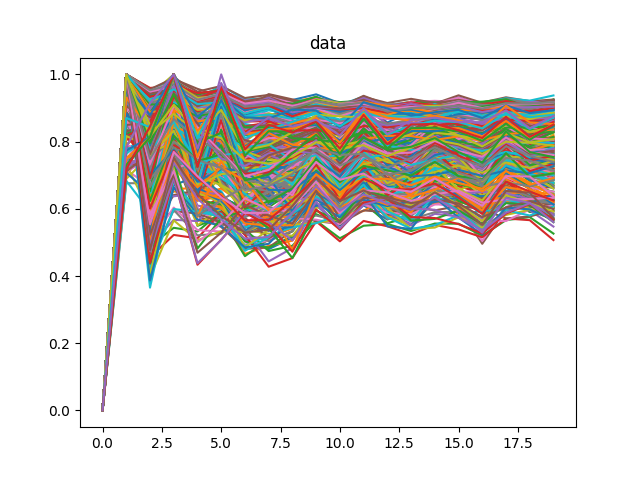

mfcc shape  (20, 325)


In [77]:
data = librosa.feature.mfcc(data)
print('before transform ', data[0][:10])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data)
data = scaler.transform(data)

show_data(data)
print('mfcc shape ', data.shape)

#  If we inverse transform and mfcc, will we get usable audio? 

after inverse transform  [-479.71692 -474.9977  -473.49344 -472.20352 -474.53415 -464.37848
 -450.7811  -429.95105 -335.3482  -251.65292]


<IPython.core.display.Javascript object>


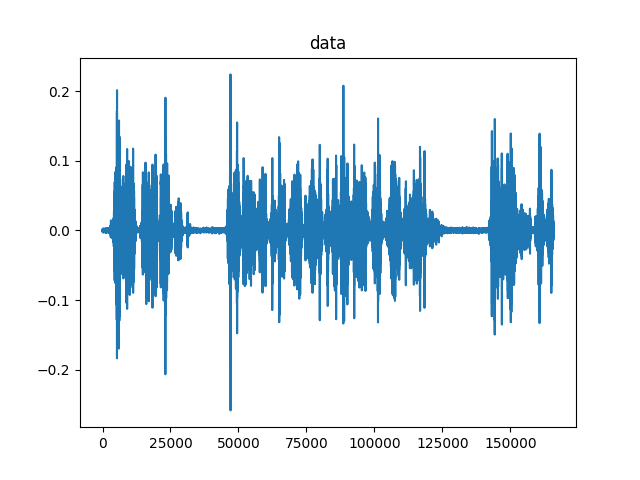

In [78]:
data = scaler.inverse_transform(data)

print('after inverse transform ', data[0][:10])

wav = librosa.feature.inverse.mfcc_to_audio(data)
show_data(wav)
ipd.Audio(wav, rate=22050)

This is not exactly what I was hoping for.  The StandardScaler has no impact.  Go back and comment out scaling lines and retry to prove to yourself.

<img src="https://i.imgur.com/pfNr1lY.jpeg"
     alt="Dalek"
     style="float: left; margin-right: 10px;" />

# bmcfee commented on Jan 25, 2018
(source: https://github.com/librosa/librosa/issues/660#issuecomment-360665933)

The short answer here is that you're not going to get a good reconstruction from mfccs for two reasons:

MFCCs discard a lot of information by a low-rank linear projection of the mel spectrum. An MFCC representation with n_mel=128 and n_mfcc=40 is analogous to a jpeg image with quality set to 30%.
you lose phase information (though there are ways to estimate it, eg griffin-lim)

# A: No, you will not get a decent reverse of mfcc to audio.